# Variables definition

In [1]:
import os
from dotenv import load_dotenv

if not load_dotenv("./../../../config/credentials_my.env", override=True):
    print("Environment variables not loaded :-(")
else:
    print("Environment variables have been loaded ;-)")


openai_endpoint       = os.environ["AZURE_OPENAI_ENDPOINT"]
openai_api_key        = os.environ["AZURE_OPENAI_API_KEY"]
openai_api_version    = os.environ["openai_api_version"]
azure_deployment_name = "gpt-4o-for-apim" # os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"]

apim_endpoint         = os.environ["apim_endpoint"]
apim_subscription_key = os.environ["apim_subscription_key_premium"] # apim_subscription_key_service, apim_subscription_key_standard and apim_subscription_key_premium
apim_api_version      = os.environ["apim_api_version"] # never used

messages = [
    {
      "role": "user",
      "content": "what is the nuclear fusion? explain in less than 20 words"
    }
]

print(f"openai_endpoint: {openai_endpoint}\tDeployment name: {azure_deployment_name}")
print(f"apim_endpoint: {apim_endpoint}\tDeployment name: {azure_deployment_name}")

Environment variables have been loaded ;-)
openai_endpoint: https://mmoaiswc-01.openai.azure.com/	Deployment name: gpt-4o-for-apim
apim_endpoint: https://aigov01apim.azure-api.net/balanced-azure-openai-service-api/	Deployment name: gpt-4o-for-apim


# Invoking Open AI via HTTP

In [2]:
import requests

messages_json = {"messages": messages}

url = f"{openai_endpoint}openai/deployments/{azure_deployment_name}/chat/completions?api-version={openai_api_version}"
print(f'This is the Open AI endpoint and body that is invoked:\n- {url}\n- {messages_json}')

This is the Open AI endpoint and body that is invoked:
- https://mmoaiswc-01.openai.azure.com/openai/deployments/gpt-4o-for-apim/chat/completions?api-version=2025-04-28
- {'messages': [{'role': 'user', 'content': 'what is the nuclear fusion? explain in less than 20 words'}]}


In [3]:
response_http = requests.post(url, headers = {'api-key':openai_api_key}, json = {"messages": messages})

if (int(response_http.status_code / 100))==2:
    print(f"{response_http.json()['choices'][0]['message']['content']}\nx-ms-region = {response_http.headers['x-ms-region']}")
else:
    print(response_http.text)

Nuclear fusion is the process where atomic nuclei combine to form a heavier nucleus, releasing massive energy.
x-ms-region = Sweden Central


# Invoking Open AI via Azure SDK

In [4]:
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint = openai_endpoint,
    api_key        = openai_api_key,
    api_version    = openai_api_version
)

In [5]:
response_sdk = client.chat.completions.create(
    model    = azure_deployment_name,
    messages = messages)

print(response_sdk.choices[0].message.content)

Nuclear fusion is the process where atomic nuclei combine, releasing massive energy, powering stars like the Sun.


# Invoking APIM via HTTP

In [6]:
import requests

messages_json = {"messages": messages}

url = f"{apim_endpoint}openai/deployments/{azure_deployment_name}/chat/completions?api-version={openai_api_version}"
print(f'This is the Open AI endpoint and body that is invoked:\n- {url}\n- {messages_json}')

This is the Open AI endpoint and body that is invoked:
- https://aigov01apim.azure-api.net/balanced-azure-openai-service-api/openai/deployments/gpt-4o-for-apim/chat/completions?api-version=2025-04-28
- {'messages': [{'role': 'user', 'content': 'what is the nuclear fusion? explain in less than 20 words'}]}


In [7]:
response_http = requests.post(url, headers = {'api-key':apim_subscription_key}, json = {"messages": messages})
if (int(response_http.status_code / 100))==2:
    print(f"{response_http.json()['choices'][0]['message']['content']}\nx-ms-region = {response_http.headers['x-ms-region']}")
else:
    print(response_http.text)

Nuclear fusion is the process where atomic nuclei combine to form heavier nuclei, releasing massive energy.
x-ms-region = Sweden Central


# Invoking APIM via Azure SDK

In [8]:
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint = apim_endpoint,
    api_key        = apim_subscription_key,
    api_version    = openai_api_version
)

In [9]:
response_sdk = client.chat.completions.create(
    model    = azure_deployment_name,
    messages = messages)

print(response_sdk.choices[0].message.content)

Nuclear fusion is the process where atomic nuclei combine to form heavier nuclei, releasing massive amounts of energy.


## Loading test
Please configure `APIM Backend Circuit Breaker` as follows before running the following cell:<br/>
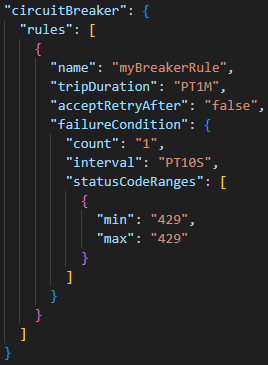

In [10]:
from datetime import datetime
for i in range(1000):
    response_sdk = client.chat.completions.create(
        model    = azure_deployment_name,
        messages = messages)

    # Format with one decimal digit for seconds
    now = datetime.now()
    formatted = now.strftime('%Y-%m-%d %H:%M:%S.') + f'{now.microsecond // 100000}'

    print(f"step {i+1} at {formatted}: {response_sdk.choices[0].message.content}")

step 1 at 2025-07-20 16:20:05.5: Nuclear fusion is the process where atomic nuclei combine to form a heavier nucleus, releasing massive energy.
step 2 at 2025-07-20 16:20:05.9: Nuclear fusion is the process where atomic nuclei combine, releasing vast energy, as in stars like the Sun.
step 3 at 2025-07-20 16:20:06.3: Nuclear fusion is the process of combining atomic nuclei to release massive energy, powering stars like the Sun.
step 4 at 2025-07-20 16:20:06.8: Nuclear fusion is the process where atomic nuclei combine, releasing energy, powering stars like the Sun.
step 5 at 2025-07-20 16:20:07.2: Nuclear fusion is the process where atomic nuclei combine, releasing immense energy, as seen in stars.
step 6 at 2025-07-20 16:20:16.4: Nuclear fusion is the process of combining atomic nuclei to release energy, powering stars like the Sun.
step 7 at 2025-07-20 16:20:16.9: Nuclear fusion is the process where atomic nuclei combine to form heavier nuclei, releasing massive energy.
step 8 at 2025-